<a href="https://colab.research.google.com/github/Avotexs/Amazon_Data_Analysis_Project/blob/main/%20G6_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd


path = 'https://raw.githubusercontent.com/EMSIMa/ADD3IIR/main/Projet/Datasets/amazon.csv'
data = pd.read_csv(path)

# Affichage des premières lignes pour vérifier que les données sont chargées correctement
print(data.head())

  show_id   type                 title        director  \
0      s1  Movie   The Grand Seduction    Don McKellar   
1      s2  Movie  Take Care Good Night    Girish Joshi   
2      s3  Movie  Secrets of Deception     Josh Webber   
3      s4  Movie    Pink: Staying True  Sonia Anderson   
4      s5  Movie         Monster Maker    Giles Foster   

                                                cast         country  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar           India   
2  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   United States   
3  Interviews with: Pink, Adele, Beyoncé, Britney...   United States   
4  Harry Dean Stanton, Kieran O'Brien, George Cos...  United Kingdom   

       date_added  release_year rating duration                listed_in  \
0  March 30, 2021          2014    NaN  113 min            Comedy, Drama   
1  March 30, 2021          2018    13+  110 min     Drama, Interna

In [42]:
# Vérification des valeurs manquantes
print(data.isnull().sum())

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64




Top 5 des meilleures catégories
Supposons que le dataset contient une colonne category et une colonne rating.


listed_in
Drama       3687
Comedy      2099
Action      1657
Suspense    1501
Kids        1085
Name: count, dtype: int64


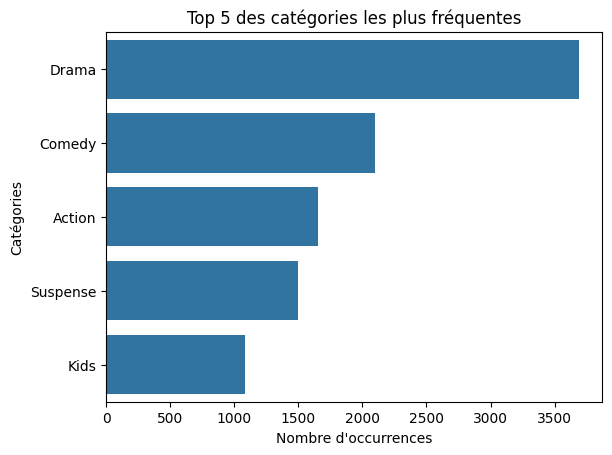

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suppression des lignes avec des données manquantes dans la colonne 'listed_in'
data = data.dropna(subset=['listed_in'])

# Séparation des catégories et comptage des occurrences
categories = data['listed_in'].str.split(', ').explode()
top_categories = categories.value_counts().head(5)

# Affichage des résultats
print(top_categories)
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 5 des catégories les plus fréquentes')
plt.xlabel('Nombre d\'occurrences')
plt.ylabel('Catégories')
plt.show()


Top 5 des réalisateurs
Supposons une colonne director.

<ipython-input-44-9a72dbc316ef>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_directors.index, y=top_directors.values, palette='coolwarm')
<ipython-input-44-9a72dbc316ef>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)


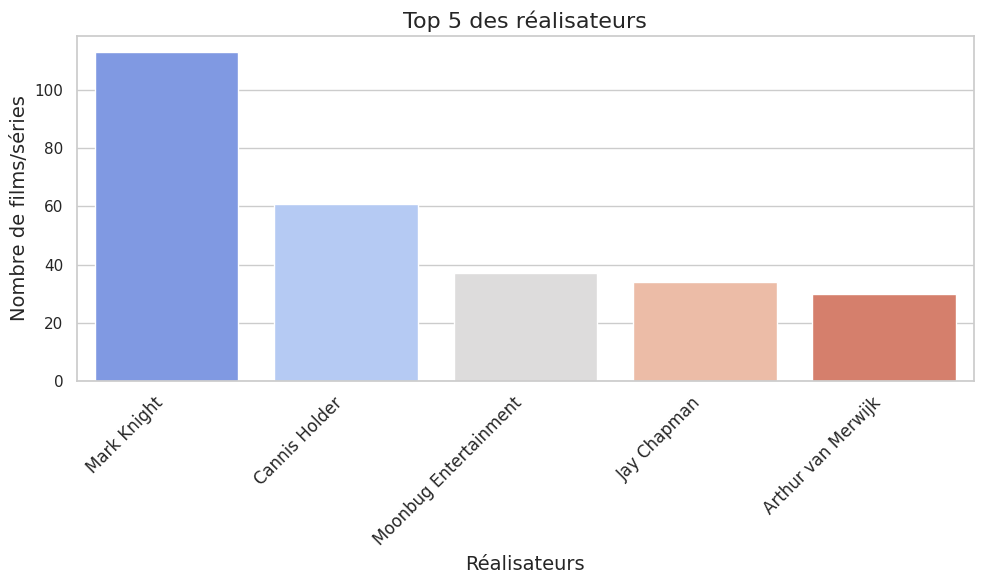

In [44]:


# Suppression des lignes avec des données manquantes dans la colonne 'director'
#data = data.dropna(subset=['director'])


top_directors = data['director'].value_counts().head(5)

sns.set(style="whitegrid")

# Création d'un graphique en barres pour les top réalisateurs
plt.figure(figsize=(10, 6))  # Ajustement de la taille du graphique
ax = sns.barplot(x=top_directors.index, y=top_directors.values, palette='coolwarm')

# Ajout du titre et des étiquettes des axes
plt.title('Top 5 des réalisateurs', fontsize=16)
plt.xlabel('Réalisateurs', fontsize=14)
plt.ylabel('Nombre de films/séries', fontsize=14)

# Rotation des étiquettes de l'axe x pour une meilleure lisibilité
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=12)

# Affichage du graphique
plt.tight_layout()
plt.show()

 Les cinq meilleures séries télévisées avec le plus grand nombre de saisons.

<ipython-input-45-0804e88afd1c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['num_seasons'] = tv_shows['duration'].str.extract('(\d+) Season').astype(float)
<ipython-input-45-0804e88afd1c>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_seasons', y='title', data=top_tv_shows, palette='cool')


                            title  duration  num_seasons
17                     Zoo Babies  1 Season          1.0
18  Zoë Coombs Marr: Bossy Bottom  1 Season          1.0
20                     Zoboomafoo  1 Season          1.0
21      Zo Zo Zombie: Mini-Series  1 Season          1.0
23                   ZeroZeroZero  1 Season          1.0
                         title  num_seasons
770           The Amazing Race         29.0
1007            Silent Witness         21.0
840                   Survivor         19.0
8071             Top Gear (UK)         15.0
3291  America's Next Top Model         14.0


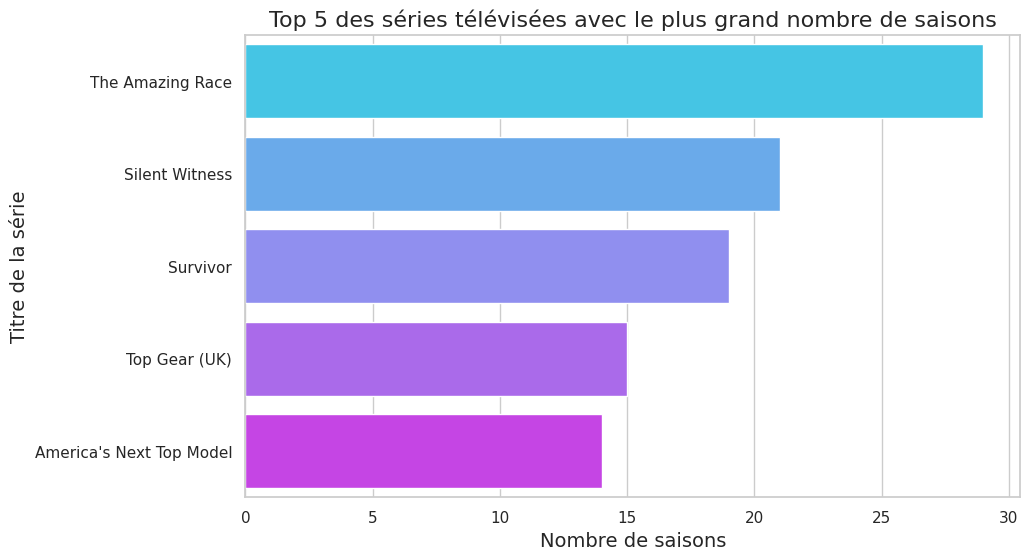

In [45]:
# Suppression des lignes avec des données manquantes dans la colonne 'duration'
data = data.dropna(subset=['duration'])

# Filtrage pour ne garder que les séries télévisées
tv_shows = data[data['type'] == 'TV Show']

# Extraction du nombre de saisons à partir de la colonne 'duration'
tv_shows['num_seasons'] = tv_shows['duration'].str.extract('(\d+) Season').astype(float)
# Tri des séries par le nombre de saisons et sélection des cinq premières
top_tv_shows = tv_shows.sort_values(by='num_seasons', ascending=False).head(5)

# Vérification des données extraites
print(tv_shows[['title', 'duration', 'num_seasons']].head())
print(top_tv_shows[['title', 'num_seasons']])

# Création d'un graphique en barres pour visualiser les données
plt.figure(figsize=(10, 6))
sns.barplot(x='num_seasons', y='title', data=top_tv_shows, palette='cool')
plt.title('Top 5 des séries télévisées avec le plus grand nombre de saisons', fontsize=16)
plt.xlabel('Nombre de saisons', fontsize=14)
plt.ylabel('Titre de la série', fontsize=14)
plt.show()

Identifier des contenus similaires en faisant correspondre des caractéristiques textuelles


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Suppression des lignes avec des données manquantes dans la colonne 'description'
#data = data.dropna(subset=['description'])
# TF-IDF des descriptions
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['description'].dropna()) #en cas d'utilisation du supression en haut ici on met: tfidf_matrix = tfidf.fit_transform(data['description'])

# Calcul de la matrice de similarité cosinus
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Fonction pour obtenir des recommandations
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = data.index[data['title'] == title].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # top 5 similar contents
    movie_indices = [i[0] for i in sim_scores]
    return data['title'].iloc[movie_indices]

# Exemple d'utilisation
print(get_recommendations('Hired Gun'))

7775            Winner Take All
2765    Crazy Hearts: Nashville
3795     Padi Padi Leche Manasu
473             The Raveonettes
7310        I Always Said After
Name: title, dtype: object


Amazon se concentre-t-il davantage sur les séries télévisées que sur les
films ces dernières années ?

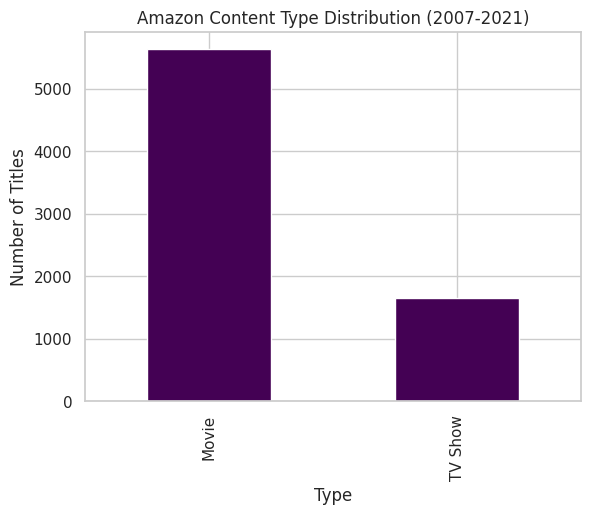

Percentage of Movies: 77.25%
Percentage of TV Shows: 22.75%
Amazon has produced a higher percentage of movies than TV shows between 2007 and 2021.


In [54]:
# Filter data for years between 2007 and 2021
data_filtered = data[(data['release_year'] >= 2007) & (data['release_year'] <= 2021)]

# Group data by release year and count occurrences to know what is exactly the last years are? my estimation is 2007-2021(last year in the data)
# print(data['release_year'].describe())


# Group data by type and count occurrences
grouped_data = data_filtered.groupby('type').size()

# Create a bar chart to visualize the results
grouped_data.plot(kind='bar', colormap='viridis')
plt.title('Amazon Content Type Distribution (2007-2021)')
plt.xlabel('Type')
plt.ylabel('Number of Titles')
plt.show()

# Calculate the percentage of each type
total_count = grouped_data.sum()
percentages = (grouped_data / total_count) * 100

# Print the results
print(f"Percentage of Movies: {percentages['Movie']:.2f}%")
print(f"Percentage of TV Shows: {percentages['TV Show']:.2f}%")

# Compare the percentages
if percentages['TV Show'] > percentages['Movie']:
    print("Amazon has produced a higher percentage of TV shows than movies between 2007 and 2021.")
else:
    print("Amazon has produced a higher percentage of movies than TV shows between 2007 and 2021.")


